![](../src/logo.svg)

**© Jesús López**

Ask him any doubt on **[Twitter](https://twitter.com/jsulopz)** or **[LinkedIn](https://linkedin.com/in/jsulopz)**

<a href="https://colab.research.google.com/github/jsulopz/resolving-machine-learning/blob/main/05_Cluster%20Analysis%20con%20k-Means/05_clustering-kmeans_practice_solution.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# 05 | Cluster Analysis with k-Means

## Load the Data

- Simply execute the following lines of code to load the data
- This dataset contains **statistics** (columns)
- About **Car Models** (rows)

In [126]:
import seaborn as sns #!

df_mpg = sns.load_dataset(name='mpg', index_col='name')
df_mpg.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
name,,,,,,,,
volkswagen rabbit l,36.0,4,105.0,74.0,1980,15.3,82,europe
pontiac catalina,16.0,8,400.0,170.0,4668,11.5,75,usa
plymouth champ,39.0,4,86.0,64.0,1875,16.4,81,usa
cadillac eldorado,23.0,8,350.0,125.0,3900,17.4,79,usa
ford fairmont (auto),20.2,6,200.0,85.0,2965,15.8,78,usa


## Feature Selection

- Select 2 columns for the modelling

In [157]:
df_select = df_mpg[['acceleration', 'weight']]

## Data `preprocessing`

- Do you need to *transform* the data
- To get a **truthful insight** of the model?

In [158]:
from sklearn.preprocessing import MinMaxScaler

In [159]:
scaler = MinMaxScaler()

In [160]:
import pandas as pd

In [161]:
df_scaled= pd.DataFrame(scaler.fit_transform(X=df_select))

## `KMeans()` Model in Python

### Fit the Model

- To cluster 3 groups

In [162]:
from sklearn.cluster import KMeans

In [163]:
model_km= KMeans(n_clusters=3)

In [164]:
model_km.fit(X=df_scaled)

C:\Users\User\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=3)

### Calculate Predictions

In [165]:
df_scaled

,0,1
0,0.238095,0.536150
1,0.208333,0.589736
2,0.178571,0.516870
3,0.238095,0.516019
4,0.148810,0.520556
...,...,...
393,0.452381,0.333711
394,0.988095,0.146583
395,0.214286,0.193365
396,0.630952,0.286929


In [166]:
model_km.predict(X=df_scaled)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 2, 0, 1, 1, 0, 2, 2, 2, 2, 1, 1, 1,
       1, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 1, 1, 2, 1, 1, 1, 1, 2, 1,
       2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1,
       1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 0, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 0,
       0, 0, 0, 0, 0, 2, 0, 1, 1, 1, 1, 2, 2, 2, 2,

### Create a New DataFrame for the Predictions

In [167]:
df_pred = df_select.reset_index(drop=True)

In [168]:
df_pred['pred_km'] = model_km.predict(X=df_scaled)


### Visualize the Model

- You colour the points with the the value of the predictions

<AxesSubplot: xlabel='acceleration', ylabel='weight'>

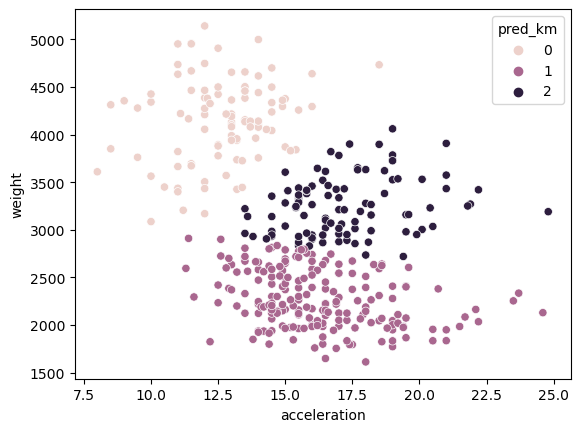

In [170]:
sns.scatterplot(data=df_pred,x='acceleration', y='weight', hue='pred_km')

## Other `Clustering` Models in Python

- Visit the `sklearn` website [here ↗](https://scikit-learn.org/stable/)
- **Pick 2 new models** and compute the *Clustering*

### Other Model 1

#### Fit the Model

- To cluster 3 groups

In [171]:
from sklearn.cluster import SpectralClustering

In [172]:
model_sc= SpectralClustering(n_clusters=3)

In [173]:
model_sc.fit(X=df_pred.drop(columns='pred_km'))

C:\Users\User\miniconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\User\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\User\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:420: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  est = KMeans(


SpectralClustering(n_clusters=3)

#### Calculate Predictions

In [174]:
df_pred

,acceleration,weight,pred_km
0,12.0,3504,0
1,11.5,3693,0
2,11.0,3436,0
3,12.0,3433,0
4,10.5,3449,0
...,...,...,...
393,15.6,2790,1
394,24.6,2130,1
395,11.6,2295,1
396,18.6,2625,1


In [175]:
df_select

,acceleration,weight
name,,
chevrolet chevelle malibu,12.0,3504
buick skylark 320,11.5,3693
plymouth satellite,11.0,3436
amc rebel sst,12.0,3433
ford torino,10.5,3449
...,...,...
ford mustang gl,15.6,2790
vw pickup,24.6,2130
dodge rampage,11.6,2295


In [176]:
pred_sc = model_sc.fit_predict(X=df_scaled)

C:\Users\User\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


#### Create a New Column for the Predictions

In [177]:
df_pred['pred_sc'] = model_sc.fit_predict(X=df_select)

C:\Users\User\miniconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\User\miniconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:393: UserWarning: Exited at iteration 60 with accuracies 
[6.07916504e-15 6.48008501e-06 1.42898111e-05 8.58568812e-06]
not reaching the requested tolerance 1.258586508747015e-05.
  _, diffusion_map = lobpcg(
C:\Users\User\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\User\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:420: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  est = KMeans(


In [178]:
df_pred

,acceleration,weight,pred_km,pred_sc
0,12.0,3504,0,0
1,11.5,3693,0,0
2,11.0,3436,0,0
3,12.0,3433,0,0
4,10.5,3449,0,0
...,...,...,...,...
393,15.6,2790,1,0
394,24.6,2130,1,0
395,11.6,2295,1,0
396,18.6,2625,1,0


#### Visualize the Model

<AxesSubplot: xlabel='acceleration', ylabel='weight'>

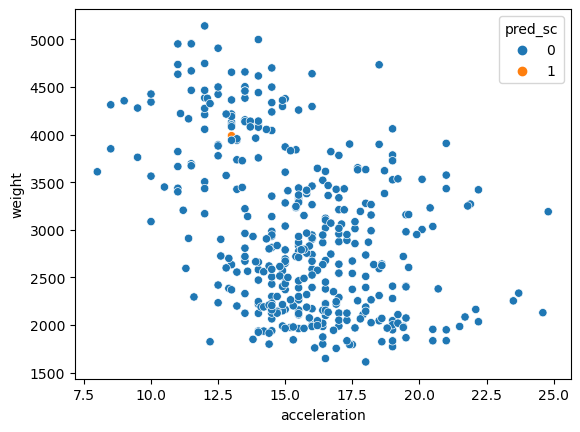

In [180]:
sns.scatterplot(data=df_pred,x='acceleration', y='weight', hue='pred_sc')

### Other Model 2

#### Fit the Model

- To cluster 3 groups

In [181]:
from sklearn.cluster import MiniBatchKMeans

In [182]:
model_mb = MiniBatchKMeans(n_clusters=3)

In [183]:
model_mb.fit(X=df_scaled)

C:\Users\User\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


MiniBatchKMeans(n_clusters=3)

#### Calculate Predictions

In [184]:
model_mb.predict(X=df_scaled)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       2, 1, 1, 0, 0, 0, 0, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 2, 2, 1, 2, 1, 1, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1, 2, 0, 0, 0, 0, 1, 2, 2,
       1, 1, 2, 1, 1, 0, 0, 2, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 2, 1, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 0, 0, 0, 0, 1, 0, 2, 2, 2, 2, 1,
       2, 0, 2, 0, 2, 1, 2, 2, 1, 1, 0, 2, 1, 0, 0, 0, 0, 0, 2, 1, 2, 1,
       2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 2, 1, 2, 1, 2, 1, 1,
       1, 1, 2, 1, 2, 2, 2, 1, 0, 0, 2, 2, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 2, 1, 2, 2, 2, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 0, 2, 2,

#### Create a New Column for the Predictions

In [185]:
df_pred['pred_mb'] = model_mb.predict(X=df_scaled)

#### Visualize the Model

<AxesSubplot: xlabel='acceleration', ylabel='weight'>

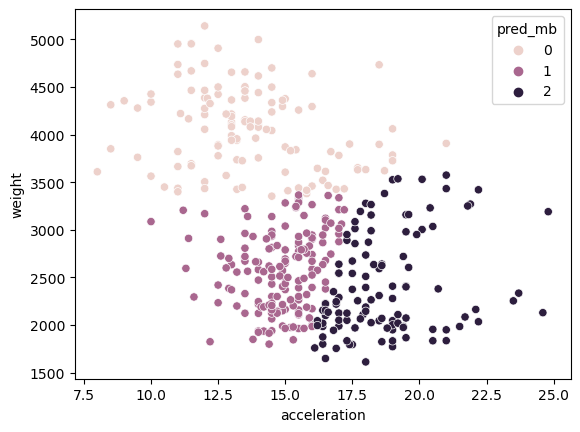

In [187]:
sns.scatterplot(data=df_pred,x='acceleration', y='weight', hue='pred_mb')

In [ ]:
df_scaled

## Achieved Goals

_Double click on **this cell** and place an `X` inside the square brackets (i.e., [X]) if you think you understand the goal:_

- [ ] Understand how the **machine optimizes a model**
    - No more than to find the best numbers for a mathematical equation
- [ ] **Residual Sum of Squares (RSS)** as a fundamental measure for the **error**. We see it on ↓
    - [Neural Networks](https://youtu.be/IHZwWFHWa-w?t=211) 
    - Linear Regression
    - Variance
- [ ] Understand the necessity to **Scale** the Data
    - For all algorithms that involves **distance calculation**.
- [ ] Understand that programming is not an end itself, but a tool to achieve the end
    - We need to understand the problem and design the solution before coding
    - But we won't need how to design the solution if we don't know how to code first
    - Solution? Apply the discipline
- [ ] There is **not a unique way to group data**. The same way it is not a unique way ↓
    - To predict a number **Regression Mathematical Equations**
    - To predict a category **Classification Mathematical Equations**

<a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-nd/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International License</a>.